<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Linear_Regression_E_Commerce_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Preperation and Visualization

In [3]:
df = pd.read_csv('Ecommerce Customers.csv')

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
sns.set_style('whitegrid')

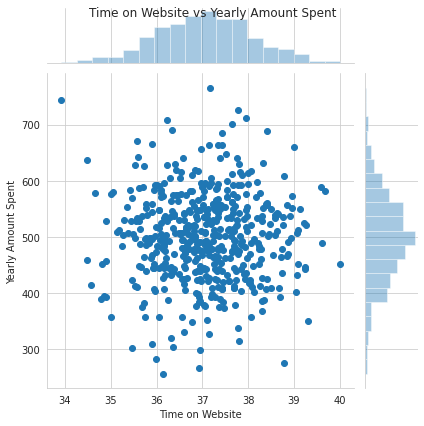

In [24]:
sns.jointplot(df['Time on Website'],df['Yearly Amount Spent']).fig.suptitle('Time on Website vs Yearly Amount Spent')
plt.tight_layout()

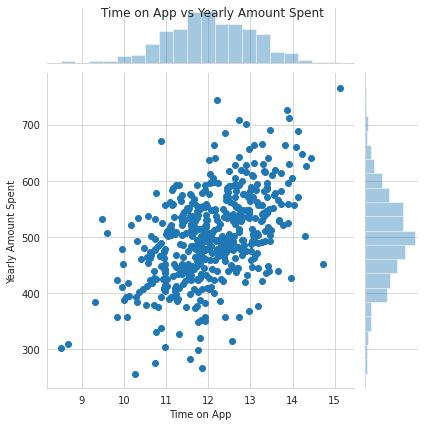

In [26]:
sns.jointplot(df['Time on App'],df['Yearly Amount Spent']).fig.suptitle('Time on App vs Yearly Amount Spent')
plt.tight_layout()

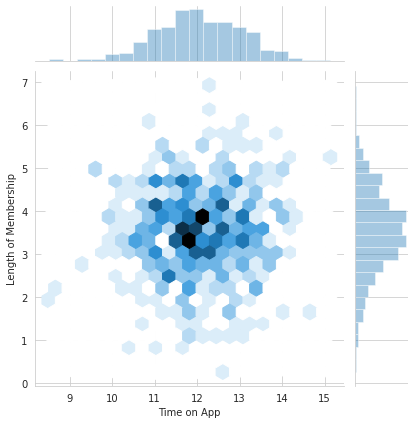

In [27]:
sns.jointplot(df['Time on App'],df['Length of Membership'],kind='hex')

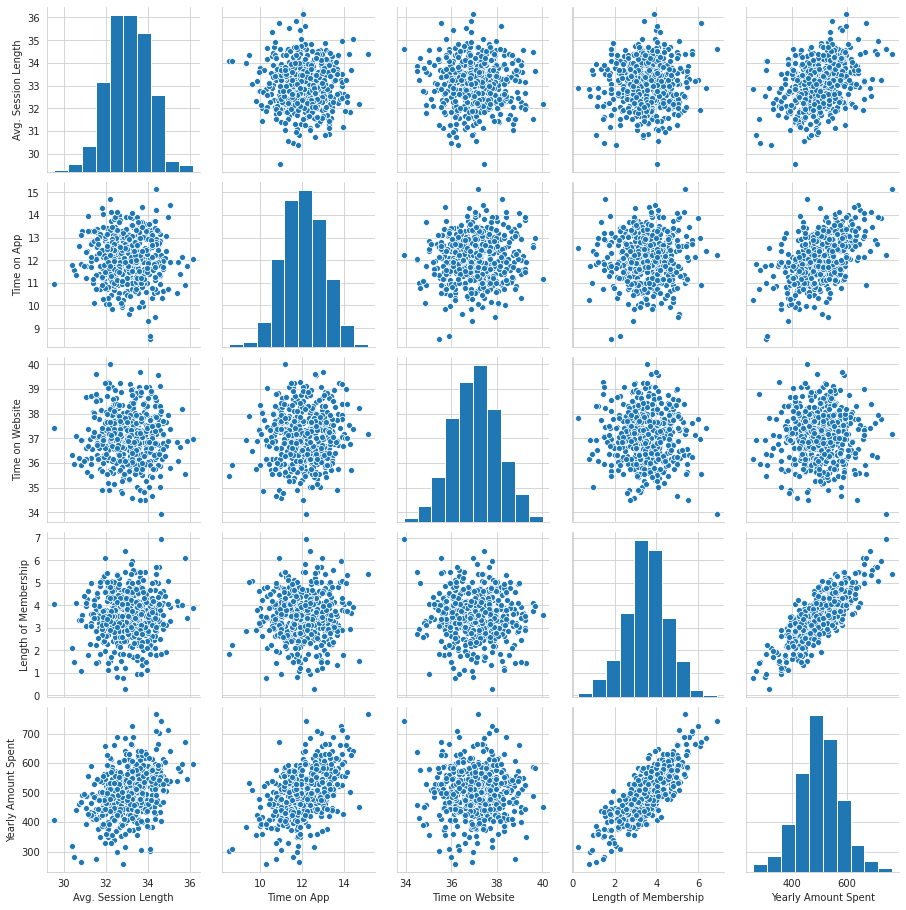

In [28]:
sns.pairplot(df)

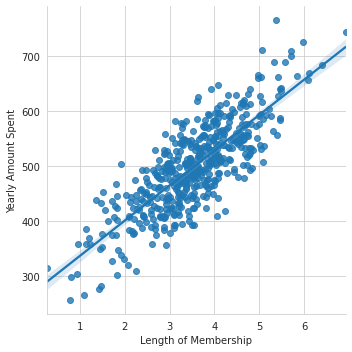

In [33]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

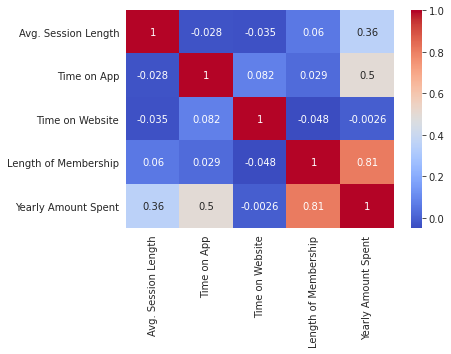

In [34]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [35]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [37]:
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [38]:
y = df['Yearly Amount Spent']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Linear Regression

In [40]:
lm = LinearRegression()

In [41]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [43]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Prediction

In [44]:
y_pred_train = lm.predict(X_train)

In [45]:
y_pred = lm.predict(X_test)

Text(0.5, 1.0, 'Scatter Plot of House Prediction')

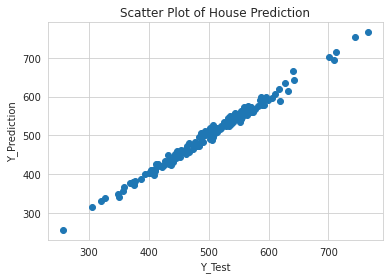

In [46]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y_Test')
plt.ylabel('Y_Prediction')
plt.title('Scatter Plot of House Prediction')

## Evaluation

In [47]:
from sklearn import metrics

In [48]:
metrics.mean_absolute_error(y_test,y_pred)

7.2281486534308295

In [49]:
metrics.mean_squared_error(y_test,y_pred)

79.8130516509743

In [50]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

8.933815066978626

## Residuals

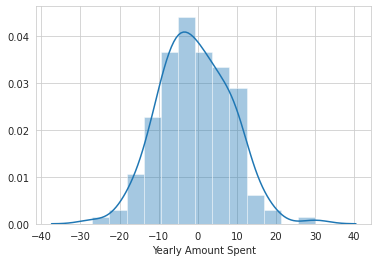

In [51]:
sns.distplot(y_test-y_pred)

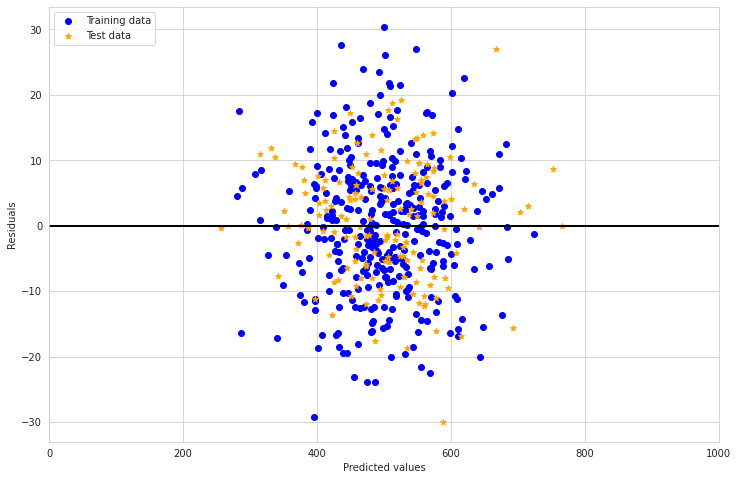

In [57]:
plt.figure(figsize=(12,8))
plt.scatter(y_pred_train, y_pred_train - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_pred, y_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=2500000, lw=2, color='k')
plt.xlim([0, 1000])
plt.show()